 #  Mapping apps for profitability at the App Store and Play Store
  **Individual Project**
 
 ## Project overview
According to [Knowband](https://www.knowband.com/blog/mobile-app/growth-of-mobile-app-market/) the mobile app market is growing fast, and just to have an idea of how big this industry is, it's believed that its economy numbers will be around $188.9B by 2020. In this scenario, regardless of the app monetization model, data analysis of app profiles can help in improving the profitability of the business.

This project is about understanding data and using the knowledge acquired in this process to improve business strategy. The two data sets used here are from [App Store](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/home) and [Google Play](https://www.kaggle.com/lava18/google-play-store-apps/home). We will focus on free English apps, trying to understand what type of apps would probably attract more users.

## Goal
* Apply mobile app data analytics to get insights that could improve the business strategy.

## Tools
* **Python** 
* **Jupyter Lab**
* **Matplotlib**

## Getting to know the data
First of all, we need to know the data sets by exploring them. This step will be facilitated by creating a function named `explore_data()` that will print rows in a more readable way and show the number of rows and columns of a given data set.

In [1]:
# Exploring data sets with the user-defined function explore_data()
def explore_data(dataset, start, end, rows_and_columns=False):     
    """
    Prints rows in a readable way and then shows the number of rows and columns of a selected data set.
    
    : dataset, expected to be a list
    : start and end, integers that represent the starting and ending indices of a slice from the data set
    : rows_and_columns is a boolean whose default argument is False; if it is True prints the number of rows and columns  
    : the function expects data doesn't have a header row, otherwise it will print one more row compared to the actual lenght
    """
    dataset_slice = dataset[start:end]
    for row in dataset_slice:
        print(row)
        print('\n')  # adds an empty new line after each row
        
    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns', len(dataset[0]))

We'll now open both data sets to explore them later. Note that the header row will be stored in a separated list.

In [2]:
# Opening the App Store and Google Play data set files
from csv import reader

# App Store data set
apple_file = open('AppleStore.csv', encoding="utf8")         
read_apple = reader(apple_file)
app_store = list(read_apple)
app_store_header = app_store[0]
app_store = app_store[1:]

# Google play data set
google_file = open('googleplaystore.csv', encoding='utf8')   
read_google = reader(google_file)
play_store = list(read_google)
play_store_header = play_store[0]
play_store =play_store[1:]

Let's see how the data look like. For this we'll print the header row, the first 3 rows of the data set, and the total numbers of rows and columns with the help from the user-defined function `explore_data()`. At first, we'll take a look at the App Store and then at the Play Store data sets.

In [3]:
print('\n{:|^100}\n'.format(' APP STORE DATA SET '))
print(app_store_header, '\n')
explore_data(app_store, 0, 3, True)
print('{:^^100}\n'.format(' APP STORE DATA SET '))


|||||||||||||||||||||||||||||||||||||||| APP STORE DATA SET ||||||||||||||||||||||||||||||||||||||||

['', 'id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'] 

['1', '281656475', 'PAC-MAN Premium', '100788224', 'USD', '3.99', '21292', '26', '4', '4.5', '6.3.5', '4+', 'Games', '38', '5', '10', '1']


['2', '281796108', 'Evernote - stay organized', '158578688', 'USD', '0', '161065', '26', '4', '3.5', '8.2.2', '4+', 'Productivity', '37', '5', '23', '1']


['3', '281940292', 'WeatherBug - Local Weather, Radar, Maps, Alerts', '100524032', 'USD', '0', '188583', '2822', '3.5', '4.5', '5.0.0', '4+', 'Weather', '37', '5', '3', '1']


Number of rows: 7197
Number of columns 17
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^ APP STORE DATA SET ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



As we can see from above, the first column in the App Store data set contains the item number represented by an integer. Since this information doesn't add any value, we can delete it.

In [4]:
# deleting row containing item number in App Store data and its respective header
del app_store_header[0]
for item in range(0, len(app_store)):
     del(app_store[item][0])

Let's see what have changed in the App Store data set after this deletion.

In [5]:
print('\n{:|^100}\n'.format(' APP STORE DATA SET '))
print(app_store_header, '\n')
explore_data(app_store, 0, 3, True)
print('{:^^100}\n'.format(' APP STORE DATA SET '))


|||||||||||||||||||||||||||||||||||||||| APP STORE DATA SET ||||||||||||||||||||||||||||||||||||||||

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'] 

['281656475', 'PAC-MAN Premium', '100788224', 'USD', '3.99', '21292', '26', '4', '4.5', '6.3.5', '4+', 'Games', '38', '5', '10', '1']


['281796108', 'Evernote - stay organized', '158578688', 'USD', '0', '161065', '26', '4', '3.5', '8.2.2', '4+', 'Productivity', '37', '5', '23', '1']


['281940292', 'WeatherBug - Local Weather, Radar, Maps, Alerts', '100524032', 'USD', '0', '188583', '2822', '3.5', '4.5', '5.0.0', '4+', 'Weather', '37', '5', '3', '1']


Number of rows: 7197
Number of columns 16
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^ APP STORE DATA SET ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



In [6]:
print('\n{:|^100}\n'.format(' PLAY STORE DATA SET '))
print(play_store_header, '\n')
explore_data(play_store, 1, 3, True)
print('{:^^100}\n'.format(' PLAY STORE DATA SET '))


||||||||||||||||||||||||||||||||||||||| PLAY STORE DATA SET ||||||||||||||||||||||||||||||||||||||||

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'] 

['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


Number of rows: 10841
Number of columns 13
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^ PLAY STORE DATA SET ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



At this point, we know that the data sets are formed by:
* **App Store**: 7197 apps and 16 features;
* **Play Store**: 10841 apps and 13 features.

For the sake of clarity, the features (columns names) for each data set are described on **Tables 1** and **2**.

**Table 1**. The 16 features in [data set](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/home) (Apple iOS App Store) of dimension 7197 rows $\times$ 16 columns. Data collected in July 2017.

|Column index |Feature            |Description                                     | 
|:-----------:|:------------------|:-----------------------------------------------|
|0            |"id"               | App ID                                         |
|1            |"track_name"       | App Name                                       | 
|2            |"size_bytes"       | Size (in Bytes)                                |
|3            |"currency"         | Currency Type                                  |
|4            |"price"            | Price amount                                   | 
|5            |"rating_count_tot" | User Rating counts (for all version)           |
|6            |"rating_count_ver" | User Rating counts (for current version)       | 
|7            |"user_rating"      | Average User Rating value (for all version)    |
|8            |"user_rating_ver"  | Average User Rating value (for current version)|
|9            |"ver"              | Latest version code                            |
|10           |"cont_rating"      | Content Rating                                 |
|11           |"prime_genre"      | Primary Genre                                  | 
|12           |"sup_devices.num"  | Number of supporting devices                   |
|13           |"ipadSc_urls.num"  | Number of screenshots showed for display       | 
|14           |"lang.num"         | Number of supported languages                  |
|15           |"vpp_lic"          | Vpp Device Based Licensing Enabled             |


**Table 2**. The 13 features in [data set](https://www.kaggle.com/lava18/google-play-store-apps/home) (Google Play Store Apps) of dimension 10841 rows $\times$ 13 columns. Data collected in August 2018.

|Column index       |Feature            |Description                                                          | 
|:-----------------:|:------------------|:--------------------------------------------------------------------|
|0                  |"App"              | Application name                                                    |
|1                  |"Category"         | Category the app belongs to                                         | 
|2                  |"Rating"           | Overall user rating of the app                                      |
|3                  |"Reviews"          | Number of user reviews for the app                                  |
|4                  |"Size"             | Size of the app                                                     | 
|5                  |"Installs"         | Number of user downloads/installs for the app                       |
|6                  |"Type"             | Paid or free                                                        | 
|7                  |"Price"            | Price of the app                                                    |
|8                  |"Content Rating"   | Age group the app is targeted at - Children / Mature 21+ / Adult    |
|9                  |"Genres"           | An app can belong to multiple genres (apart from its main category) |
|10                 |"Last Updated"     | Date when the app was last updated on Play Store                    |
|11                 |"Current Ver"      | Current version of the app available on Play Store                  | 
|12                 |"Android Ver"      | Min requered Android version                                        |


From the knowledge of the data, it seems interesting to explore further the following features:
* **App Store**: *track_name, currency, price, rating_count_tot, rating_count_ver and prime_genre*  
* **Play Store**: *App, Category, Reviews, Installs, Type, Content Rating and Genres*

## Data cleasing
Before starting the analysis, we need to ensure the consistency and quality of our data. In this preparation step, we'll:
* correct or remove inacurate data and;
* remove possible duplicates. 

Moreover, since we are interested in free English apps only, we also must:
* remove non-English apps and;
* remove paid apps.  

### Deleting incorrect data
According to this [discussion](https://www.kaggle.com/lava18/google-play-store-apps/discussion/66015), there is an error in row 10472 of Play Store data set: the feature "Category" is missing what causes a column shift in this row. Let's take a look at this:

In [7]:
print(play_store_header, '\n')
print(play_store[10472]) 

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'] 

['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


We know from the previous exploration that the Play Store data set is formed by 13 columns. We also saw that the row 10472 have only 12 entries because the second entry ("Category") is missing. At this point, we could ask: what if we didn't have the information from the discussion list? How could we discover it? An easy way to do this is comparing the number of items in each row in the `play_store` list to the number of existing items in the header row:

In [8]:
# comparing the number of items  in each row with respective number in the header row
for row in play_store:
    if len(row) != len(play_store_header):
        print('row content: {}'.format(row))
        print('row index: {}'.format(play_store.index(row)))

row content: ['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']
row index: 10472


The only missing value of this type was found on row 10472. We just confirm the information and now we can remove this data. This type of discrepancy was not found in the App Store data set.

In [9]:
del play_store[10472]    # Play Store: delecting a row with missing feature 

In [10]:
len(play_store)

10840

The number of rows in Play Store data set now changed from 10841 to 10840.

### Removing duplicates
According to the [discussion section](https://www.kaggle.com/lava18/google-play-store-apps/discussion) of the Play Store data set, some apps have duplicated entries. The app's name, located in the first column of the Play Store data set, can be used as a criterion to search for these duplicates. Using it we can create two lists: the first one containing only unique, non-repeated app names and the second containing the duplicated one.

In [11]:
duplicated_apps = []
unique_apps = []

for app in play_store:   # searching for duplicates
    name = app[0]        # app's name
    if name in  unique_apps:
        duplicated_apps.append(name)
    else:
        unique_apps.append(name)

print(f'Number of duplicated apps: {len(duplicated_apps)}')
print('\n')
print(f'Examples of duplicated apps:\n {duplicated_apps[:15]}')

Number of duplicated apps: 1181


Examples of duplicated apps:
 ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Box', 'Zenefits', 'Google Ads', 'Google My Business', 'Slack', 'FreshBooks Classic', 'Insightly CRM', 'QuickBooks Accounting: Invoicing & Expenses', 'HipChat - Chat Built for Teams', 'Xero Accounting Software']


There are **1181** cases of non-unique apps in the Play Store data set,  for example, 'Instagram' occurs 4$\times$, 'Facebook' 2$\times$ and 'Slack' 3$\times$, etc: 


In [12]:
for app in play_store:
    name = app[0]
    if name == 'Instagram':
        print(app)

['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66509917', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']


In [13]:
for app in play_store:
    name = app[0]
    if name == 'Facebook':
        print(app)

['Facebook', 'SOCIAL', '4.1', '78158306', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'August 3, 2018', 'Varies with device', 'Varies with device']
['Facebook', 'SOCIAL', '4.1', '78128208', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'August 3, 2018', 'Varies with device', 'Varies with device']


In [14]:
for app in play_store:
    name = app[0]
    if name == 'Slack':
        print(app)

['Slack', 'BUSINESS', '4.4', '51507', 'Varies with device', '5,000,000+', 'Free', '0', 'Everyone', 'Business', 'August 2, 2018', 'Varies with device', 'Varies with device']
['Slack', 'BUSINESS', '4.4', '51507', 'Varies with device', '5,000,000+', 'Free', '0', 'Everyone', 'Business', 'August 2, 2018', 'Varies with device', 'Varies with device']
['Slack', 'BUSINESS', '4.4', '51510', 'Varies with device', '5,000,000+', 'Free', '0', 'Everyone', 'Business', 'August 2, 2018', 'Varies with device', 'Varies with device']


As we can see from the examples above, the only difference between these entries is the value on the fourth column that corresponds to the number of user reviews. Since a higher number of reviews means more recent data, this information can be used as a criterion for removing duplicates instead of randon deletion.

Considering that the Play Store data set is formed by 10840 entries (header row excluded and after deletion of one wrong row) and that there are 1181 duplicates,  this will give the following number of unique entries:

In [15]:
print(f'Expected length of Play Store data: {len(play_store) - 1181}')

Expected length of Play Store data: 9659


The duplicates will be removed as follows:
* First, building a dictionary, where each _key_ is a unique app name and the corresponding _value_ is the highest number of reviews of that app;
* Second, using the information stored in this dictionary to create a new data set, which will have only one entry per app (and for each app, we'll only select the entry with the highest number of reviews).

**1.** Building the dictionary `reviews_max`, where *key = 'app name'* and *value = 'highest number of reviews'*, for example, `reviews_max{'Instagram': '66577446'}`:

In [16]:
reviews_max = {}                # dictionary where 'key = app name' and 'value = highest number of reviews'
for app in play_store:          # loop through Play Store data set, header excluded
    app_name = app[0]           # get the app name located in position 0
    n_reviews = float(app[3])   # converts the number of reviews (located in position 3) to float
    if (app_name in reviews_max) and (reviews_max[app_name] < n_reviews):
        reviews_max[name] = n_reviews
    elif app_name not in reviews_max:
        reviews_max[app_name] = n_reviews

We can compare this result with its previous estimate:

In [17]:
print(f'Expected length: {len(play_store) - 1181}')        # expected lenght excluding duplicates
print(f'Actual length:   {len(reviews_max)}')              # checking the size of the new dictionary

Expected length: 9659
Actual length:   9659


**2.** Removing duplicates with the help of dictionary `reviews_max`:

In [18]:
play_store_clean = []     # stores cleaned data set
already_added = []        # stores app name only once

for app in play_store:          # loop through Play Store data
    app_name = app[0]           # get the app name located in position 0
    n_reviews = float(app[3])   # converts the number of reviews (located in position 3) to float
    if (n_reviews == reviews_max[app_name]) and (app_name not in already_added):   # the second condition is neeeded to account for those cases 
        play_store_clean.append(app)                                               # where the highest number of reviews of a duplicate app is 
        already_added.append(app_name)                                             # the same for more than one entry  

Let's explore the new data set using our function `explore_data()`:

In [19]:
print('\n{:|^100}\n'.format(' PLAY STORE DATA SET '))
explore_data(play_store_clean, 0, 3, True)
print('{:^^100}\n'.format(' PLAY STORE DATA SET '))


||||||||||||||||||||||||||||||||||||||| PLAY STORE DATA SET ||||||||||||||||||||||||||||||||||||||||

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


Number of rows: 9659
Number of columns 13
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^ PLAY STORE DATA SET ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



As expected from previous explanations, there are 9659 rows in the new cleaned data set. Duplicates were not found in the App Store data set.

### Removing non-English apps
If we continue to explore our data sets, we'll observe that both of them contain non-English apps, as their names suggest (please see below). Since we are interested only in apps directed toward an English speaking audience, we must remove all non-English apps.  

Considering that it's possible to get a number for each character using the built-in function `ord()`, and that the numbers corresponding to the most commonly characters used in English range from 0 to 127, according to the [ASCII](https://en.wikipedia.org/wiki/ASCII) system, we can create a function called `is_English()` to check if a character belongs to the common English character list and use it as the criterion to remove non-English apps.

We also can see from our data sets, that even English apps have one or more non-English characters (please, see below), like emoticons, for example. So, if we set our new function to remove all non-English characters we also will lose important data that can be classified as non-English. A simple way to handle this problem is to allow for some non-English characters. A question that arises is, how many non-English characters should we allow? We'll address it soon, but first, let's take a look at our data:


In [20]:
print('\n{:|^100}\n'.format(' APP STORE '))
print(app_store[261])
print(app_store[454])
print(app_store[487])
print('')
print('\n{:|^100}\n'.format(' PLAY STORE '))
print(play_store[710])
print(play_store[882])
print(play_store[1452])


|||||||||||||||||||||||||||||||||||||||||||| APP STORE |||||||||||||||||||||||||||||||||||||||||||||

['340368403', 'クックパッド - No.1料理レシピ検索アプリ', '76644352', 'USD', '0', '115', '0', '3.5', '0', '17.5.1.0', '4+', 'Food & Drink', '37', '5', '1', '1']
['379395415', '携程旅行-酒店、机票、火车票预订助手', '144488448', 'USD', '0', '312', '0', '3.5', '0', '7.4.1', '17+', 'Travel', '37', '5', '1', '1']
['385724144', 'ホットペッパービューティー/サロン予約', '65892352', 'USD', '0', '9', '0', '4', '0', '4.14.1', '4+', 'Lifestyle', '37', '0', '1', '1']


|||||||||||||||||||||||||||||||||||||||||||| PLAY STORE ||||||||||||||||||||||||||||||||||||||||||||

['Flame - درب عقلك يوميا', 'EDUCATION', '4.6', '56065', '37M', '1,000,000+', 'Free', '0', 'Everyone', 'Education', 'July 26, 2018', '3.3', '4.1 and up']
['🔥 Football Wallpapers 4K | Full HD Backgrounds 😍', 'ENTERTAINMENT', '4.7', '11661', '4.0M', '1,000,000+', 'Free', '0', 'Everyone', 'Entertainment', 'July 14, 2018', '1.1.3.2', '4.0.3 and up']
['Homes.com 🏠 For Sale, Rent', 'HOUSE_A

As commented before, each character can be associated to a number using the built-in function `ord()`:

In [21]:
print('p = {:''>7}'.format(ord('p')))
print('料 = {:''>7}'.format(ord('料')))
print('😍 = {:''>6}'.format(ord('😍')))
print('テ = {:''>7}'.format(ord('テ')))
print('🏠 = {:''>7}'.format(ord('🏠')))

p =     112
料 =   26009
😍 = 128525
テ =   12486
🏠 =  127968


Now it's time to create a new user-defined function `is_English()` and test it.

In [22]:
def is_Enlish(string):
    """
    Takes in a string an returns False if there is any character in the string that doesn't belong 
    to the set of common English characters, otherwise it returns True. 
    """
    for character in string:       # loop through each character in a string
        if ord(character) > 127:   # uses bult-in function ord() that returns an integer representing each character. 
            return False
    return True

In [23]:
print(is_Enlish('ホットペッパービューティー/サロン予約'))
print(is_Enlish('Flame - درب عقلك يوميا'))
print(is_Enlish('Homes.com 🏠 For Sale'))
print(is_Enlish('Evernote - stay organized'))

False
False
False
True


Now we can improve our function to allow a specific chosen number of non-English characters to be set as stated before:

In [24]:
def is_English(string):
    """
    Takes in a string an returns False if there is any character in the string that doesn't belong
    to the set of common English characters, otherwise it returns True. 
    """
    non_ascii_count = 0
    
    for character in string:         # loop through each character in a string
        if ord(character) > 127:     # uses bult-in function ord() that returns an integer representing each character. 
            non_ascii_count += 1#    # count for non-ascii characters
            if non_ascii_count > 3:  # max limit for non-ascii characters = 3 
                return False
    return True

Finally, we can use the function `is_English()` to remove non-English apps in both data sets.

In [25]:
app_store_english = []
play_store_english = []
app_store_non_english = []
play_store_non_english = []

for app in app_store:                    # filters non-english apps on App Store
    app_name = app[1]
    if is_English(app_name):
        app_store_english.append(app)
    else:
        app_store_non_english.append(app)

for app in play_store_clean:             #filters non-english apps on Play Store
    app_name = app[0]
    if is_English(app_name):
        play_store_english.append(app)
    else:
        play_store_non_english.append(app)

Two new data sets were created for each store: one with English apps and other with non-English apps:

In [26]:
print('\n{:|^100}\n'.format(' APP STORE DATA SET: : ENGLISH APPS '))
explore_data(app_store_english, 0, 3, True)
print('{:^^100}\n'.format(' APP STORE DATA SET '))


|||||||||||||||||||||||||||||||| APP STORE DATA SET: : ENGLISH APPS ||||||||||||||||||||||||||||||||

['281656475', 'PAC-MAN Premium', '100788224', 'USD', '3.99', '21292', '26', '4', '4.5', '6.3.5', '4+', 'Games', '38', '5', '10', '1']


['281796108', 'Evernote - stay organized', '158578688', 'USD', '0', '161065', '26', '4', '3.5', '8.2.2', '4+', 'Productivity', '37', '5', '23', '1']


['281940292', 'WeatherBug - Local Weather, Radar, Maps, Alerts', '100524032', 'USD', '0', '188583', '2822', '3.5', '4.5', '5.0.0', '4+', 'Weather', '37', '5', '3', '1']


Number of rows: 6183
Number of columns 16
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^ APP STORE DATA SET ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



In [27]:
print('\n{:|^100}\n'.format(' PLAY STORE DATA SET: ENGLISH APPS '))
explore_data(play_store_english, 0, 3, True)
print('{:^^100}\n'.format(' PLAY STORE DATA SET '))


|||||||||||||||||||||||||||||||| PLAY STORE DATA SET: ENGLISH APPS |||||||||||||||||||||||||||||||||

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


Number of rows: 9614
Number of columns 13
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^ PLAY STORE DATA SET ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



In [28]:
print('\n{:|^100}\n'.format(' APP STORE DATA SET: NON-ENGLISH APPS '))
explore_data(app_store_non_english, 0, 3, True)
print('{:^^100}\n'.format(' APP STORE DATA SET '))


||||||||||||||||||||||||||||||| APP STORE DATA SET: NON-ENGLISH APPS |||||||||||||||||||||||||||||||

['299853944', '新浪新闻-阅读最新时事热门头条资讯视频', '115143680', 'USD', '0', '2229', '4', '3.5', '1', '6.2.1', '17+', 'News', '37', '0', '1', '1']


['303191318', '同花顺-炒股、股票', '122886144', 'USD', '0', '1744', '0', '3.5', '0', '10.10.46', '4+', 'Finance', '37', '0', '1', '1']


['331259725', '央视影音-海量央视内容高清直播', '54648832', 'USD', '0', '2070', '0', '2.5', '0', '6.2.0', '4+', 'Sports', '37', '0', '1', '1']


Number of rows: 1014
Number of columns 16
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^ APP STORE DATA SET ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



In [29]:
print('\n{:|^100}\n'.format(' PLAY STORE DATA SET: NON-ENGLISH APPS '))
explore_data(play_store_non_english, 0, 3, True)
print('{:^^100}\n'.format(' PLAY STORE DATA SET '))


|||||||||||||||||||||||||||||| PLAY STORE DATA SET: NON-ENGLISH APPS |||||||||||||||||||||||||||||||

['Flame - درب عقلك يوميا', 'EDUCATION', '4.6', '56065', '37M', '1,000,000+', 'Free', '0', 'Everyone', 'Education', 'July 26, 2018', '3.3', '4.1 and up']


['သိင်္ Astrology - Min Thein Kha BayDin', 'LIFESTYLE', '4.7', '2225', '15M', '100,000+', 'Free', '0', 'Everyone', 'Lifestyle', 'July 26, 2018', '4.2.1', '4.0.3 and up']


['РИА Новости', 'NEWS_AND_MAGAZINES', '4.5', '44274', '8.0M', '1,000,000+', 'Free', '0', 'Everyone', 'News & Magazines', 'August 6, 2018', '4.0.6', '4.4 and up']


Number of rows: 45
Number of columns 13
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^ PLAY STORE DATA SET ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



Using the rationale above we're able to remove non-English apps from both data sets. Howewer we may ask about the magical number 3 we used to allow non-English characters. To address this issue the function `is_English()` was applied with allowed non-English characters ranging from 0 to 10 (see Table 3)

**Table 3**. Number of apps with names in English in both stores. Different numbers of allowed non-English characters were tested.

|non-English character| App Store | Play Store | 
|:-------------------:|:---------:|-----------:|
| 0                   | 5707      | 9117       |
| 1                   | 6100      | 9523       |
| 2                   | 6155      | 9597       |
| **3**               | **6183**  | **9614**   | 
| 4                   | 6240      | 9619       |
| 5                   | 6281      | 9629       |
| 6                   | 6320      | 9632       |
| 7                   | 6354      | 9635       |
| 8                   | 6400      | 9637       |
| 9                   | 6644      | 9640       |
| 10                  | 6494      | 9643       |

For the sake of clarity, the data presented in **Table 3** were ploted below using Matlibplot for both store. While the number of apps continues to increase slowly for the App Store, for the Play Store it reaches a plateau when the maximum number of non-English characters allowed was set to 3. So, 3 seems a reasonable choice considering the cost-benefit ratio. 

The previous called "magical number" 3, used as a criterion of allowed non-English characters in the app names, is not that magical as we can see from the two plots below!

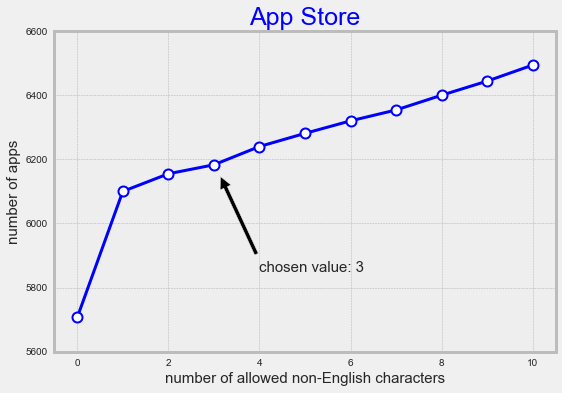

 Figure 1 . Number of English apps versus the number of allowed non-English characters for the App Store.


In [69]:
import matplotlib.pyplot as plt

x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y1 = [5707, 6100, 6155, 6183, 6240, 6281, 6320, 6354, 6400, 6444, 6494]   # App Store data from Table 3
y2 = [9177, 9523, 9597, 9614, 9619, 9629, 9632, 9635, 9637, 9640, 9643]   # Play Store data from Table 3

plt.style.use('bmh')
plt.plot(x, y1, '-ok', color='blue', markersize=10, markerfacecolor='white', markeredgewidth=2, linewidth=3)
plt.ylim(5600, 6600)
plt.ylabel('number of apps', fontsize=15)
plt.xlabel('number of allowed non-English characters', fontsize=15)
plt.title('App Store', fontsize=25, color='blue')
plt.annotate('chosen value: 3', fontsize=15, xy=(3.1, 6160), xytext=(4, 5850), arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()
print('\033[1m Figure 1 \033[0m. Number of English apps versus the number of allowed non-English characters for the App Store.')

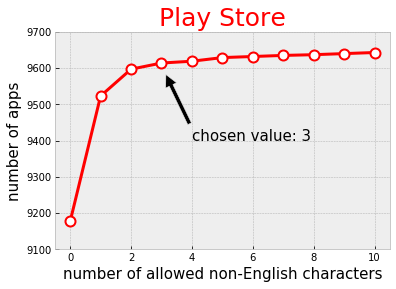

 Figure 2 . Number of English apps versus the number of allowed non-English characters for the Play Store.


In [31]:
plt.style.use('bmh')
plt.plot(x, y2, '-ok', color='red', markersize=10, markerfacecolor='white', markeredgewidth=2, linewidth=3)
plt.ylim(9100, 9700)
plt.ylabel('number of apps', fontsize=15)
plt.xlabel('number of allowed non-English characters', fontsize=15)
plt.title('Play Store', fontsize=25, color='red')
plt.annotate('chosen value: 3', fontsize=15, xy=(3.1, 9590), xytext=(4, 9400), arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()
print('\033[1m Figure 2 \033[0m. Number of English apps versus the number of allowed non-English characters for the Play Store.')

### Selecting free apps
The last part of our data preparation will be the selection of free apps in both stores. This job is relatively easy as we can see below. We also store paid apps, just in case we need it later.


In [32]:
app_store_eng_free = []
app_store_eng_paid = []

for app_price in app_store_english:           # sorting out free & paid apps at App Store
    if app_price[4] == '0':
        app_store_eng_free.append(app_price)
    else:
        app_store_eng_paid.append(app_price)

play_store_eng_free = []
play_store_eng_paid = []

for app_price in play_store_english:          # sorting out free & paid apps at Play Store
    if app_price[7] == '0':
        play_store_eng_free.append(app_price)
    else:
        play_store_eng_paid.append(app_price)

In [33]:
print('\n{:|^100}\n'.format(' APP STORE DATA SET: ENGLISH & FREE APPS '))
explore_data(app_store_eng_free, 0, 3, True)
print('{:^^100}\n'.format(' APP STORE DATA SET '))


||||||||||||||||||||||||||||| APP STORE DATA SET: ENGLISH & FREE APPS ||||||||||||||||||||||||||||||

['281796108', 'Evernote - stay organized', '158578688', 'USD', '0', '161065', '26', '4', '3.5', '8.2.2', '4+', 'Productivity', '37', '5', '23', '1']


['281940292', 'WeatherBug - Local Weather, Radar, Maps, Alerts', '100524032', 'USD', '0', '188583', '2822', '3.5', '4.5', '5.0.0', '4+', 'Weather', '37', '5', '3', '1']


['282614216', 'eBay: Best App to Buy, Sell, Save! Online Shopping', '128512000', 'USD', '0', '262241', '649', '4', '4.5', '5.10.0', '12+', 'Shopping', '37', '5', '9', '1']


Number of rows: 3222
Number of columns 16
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^ APP STORE DATA SET ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



In [34]:
print('\n{:|^100}\n'.format(' PLAY STORE DATA SET: ENGLISH & FREE APPS '))
explore_data(play_store_eng_free, 0, 3, True)
print('{:^^100}\n'.format(' PLAY STORE DATA SET '))


||||||||||||||||||||||||||||| PLAY STORE DATA SET: ENGLISH & FREE APPS |||||||||||||||||||||||||||||

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


Number of rows: 8862
Number of columns 13
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^ PLAY STORE DATA SET ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



In [35]:
print('\n{:|^100}\n'.format(' APP STORE DATA SET: ENGLISH & PAID APPS '))
explore_data(app_store_eng_paid, 0, 3, True)
print('{:^^100}\n'.format(' APP STORE DATA SET '))


||||||||||||||||||||||||||||| APP STORE DATA SET: ENGLISH & PAID APPS ||||||||||||||||||||||||||||||

['281656475', 'PAC-MAN Premium', '100788224', 'USD', '3.99', '21292', '26', '4', '4.5', '6.3.5', '4+', 'Games', '38', '5', '10', '1']


['283619399', 'Shanghai Mahjong', '10485713', 'USD', '0.99', '8253', '5516', '4', '4', '1.8', '4+', 'Games', '47', '5', '1', '1']


['284666222', 'PCalc - The Best Calculator', '49250304', 'USD', '9.99', '1117', '4', '4.5', '5', '3.6.6', '4+', 'Utilities', '37', '5', '1', '1']


Number of rows: 2961
Number of columns 16
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^ APP STORE DATA SET ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



In [36]:
print('\n{:|^100}\n'.format(' PLAY STORE DATA SET: ENGLISH & PAID APPS '))
explore_data(play_store_eng_paid, 0, 3, True)
print('{:^^100}\n'.format(' PLAY STORE DATA SET '))


||||||||||||||||||||||||||||| PLAY STORE DATA SET: ENGLISH & PAID APPS |||||||||||||||||||||||||||||

['TurboScan: scan documents and receipts in PDF', 'BUSINESS', '4.7', '11442', '6.8M', '100,000+', 'Paid', '$4.99', 'Everyone', 'Business', 'March 25, 2018', '1.5.2', '4.0 and up']


['Tiny Scanner Pro: PDF Doc Scan', 'BUSINESS', '4.8', '10295', '39M', '100,000+', 'Paid', '$4.99', 'Everyone', 'Business', 'April 11, 2017', '3.4.6', '3.0 and up']


['Puffin Browser Pro', 'COMMUNICATION', '4.0', '18247', 'Varies with device', '100,000+', 'Paid', '$3.99', 'Everyone', 'Communication', 'July 5, 2018', '7.5.3.20547', '4.1 and up']


Number of rows: 752
Number of columns 13
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^ PLAY STORE DATA SET ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



To sum up, we finished the preparation step and now our data sets are ready to be used, and what we have done so far, is summarized in **Flowchart 1**.

![](flowchart_60perc.jpg)
**Flowchart 1.** What we have done so far: the cleasing data protocol.

Before moving forward, there is an interesting finding about our data sets. Even though we are interested in free apps, it's worth comparing paid and free apps. As we can see from **Figure 3**, while the Play Store is made up of about 92% of free apps, the App Store has about 52% of free apps.

In [37]:
import matplotlib
#import matplotlib.pyplot as plt
import numpy as np

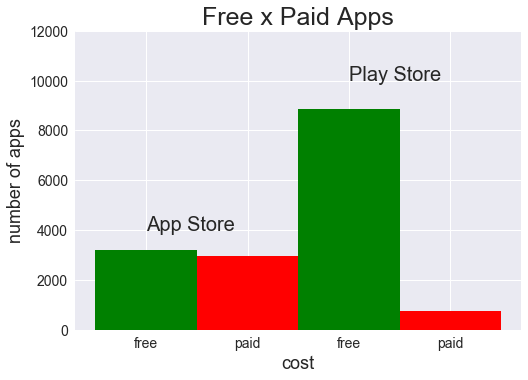

 Figure 3 . Free versus paid apps: a comparison between App Store and Play Store.



In [38]:
# store = ['App Store free', 'App Store paid', 'Play Store free', 'Play Store paid']
store = ['free', 'paid', 'free', 'paid']
index = np.arange(len(store))        #  a numpy methot that generates an array of sequential numbers
apps = [3222, 2961, 8862, 752]

plt.style.use('seaborn')
plt.bar(index, apps, color=('green','red','green','red'), align='center', width=1.0)
plt.xlabel('cost', fontsize=18)
plt.ylabel('number of apps', fontsize=18)
plt.xticks(index, store, fontsize=14, rotation=0)
plt.yticks(fontsize=14)
plt.ylim(0, 12000)
plt.title('Free x Paid Apps', fontsize=25)
plt.annotate('App Store', fontsize=20, xy=(0.0, 4000))
plt.annotate('Play Store', fontsize=20, xy=(2.0, 10000))
plt.show()
print('\033[1m Figure 3 \033[0m. Free versus paid apps: a comparison between App Store and Play Store.\n')  # using unicode for bold

## Data analysis

At this point, we can resume the main focus of this project that is trying to understand what type of apps will probably attract more users, which will directly influence the company revenue. 

To keep risks and overhead minimal, the validation strategy adopted for an app idea consists of three steps:
* Build a minimal Android version of the app, and add it to Play Store;
* If the app has a good response from users, we develop it further;
* If the app is profitable after six months, we build an iOS version of the app and add it to the App Store.

Because our main goal is to add the app on both stores, we need to find app profiles that are successful in both markets. For instance, a profile that works well for both markets might be a productivity app that makes use of gamification. [Gamification](https://www.bunchball.com/gamification) "is the process of taking something that already exists – a website, an enterprise application, an online community – and integrating game mechanics into it to motivate participation, engagement, and loyalty. Gamification takes the data-driven techniques that game designers use to engage players, and applies them to non-game experiences to motivate actions that add value to your business."

So, we can start by answering the following question: **what are the most common genres for each market?**

### Most common apps by genre on App Store and Play Store

In [39]:
def frequency_table(data_set, column_index):
    """
    Take in as input the data set and the index of a column associated to the desired feature 
    and generate the respective frequency table in percentages
    
    : data_set, expected to be a list of lists
    : column_index, expected to be an integer
    """
    frequency_table = {}
    count = 0
    
    for row in data_set:
        count += 1
        app_feature = row[column_index]
        if app_feature in frequency_table:
            frequency_table[app_feature] += 1
        else:
            frequency_table[app_feature] = 1
            
    percent_table = {}
    for key in frequency_table:
        percentage = (frequency_table[key] / count) * 100
        percent_table[key] = percentage
        
    return percent_table

In [40]:
def frequency_table_Sorted(data_set, column_index):
    """
    Take in as input the data set and the index of a column associated to the desired feature 
    and generate the respective frequency table in percentages that are then sorted in ascending 
    order.
    
    : data_set, expected to be a list of lists
    : column_index, expected to be an integer
    """
    table = frequency_table(data_set, column_index)
    table_display = []
    ordered_table_dict = {}
    inv_ordered_table_dict = {}

    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)
#    ordered_table = sorted(table_display, reverse=True)  # the results are printed in descending order
    ordered_table = sorted(table_display)                 # the results are printed in ascending order
    ordered_table_dict = dict(ordered_table)              # transform into a dictionary: to plot a graph with matlibplot
    inv_ordered_table_dict = {v: k for k, v in ordered_table_dict.items()}  # invert dictionary key and value 
#    return ordered_table
    return inv_ordered_table_dict
       

In [41]:
freq_tab_sorted = frequency_table_Sorted(data_set = app_store_eng_free, column_index = 11)
freq_tab_sorted

{'Catalogs': 0.12414649286157665,
 'Navigation': 0.186219739292365,
 'Book': 0.4345127250155183,
 'Business': 0.5276225946617008,
 'Reference': 0.5586592178770949,
 'Food & Drink': 0.8069522036002483,
 'Weather': 0.8690254500310366,
 'Finance': 1.1173184357541899,
 'Travel': 1.2414649286157666,
 'News': 1.3345747982619491,
 'Lifestyle': 1.5828677839851024,
 'Productivity': 1.7380509000620732,
 'Health & Fitness': 2.0173805090006205,
 'Music': 2.0484171322160147,
 'Sports': 2.1415270018621975,
 'Utilities': 2.5139664804469275,
 'Shopping': 2.60707635009311,
 'Social Networking': 3.2898820608317814,
 'Education': 3.662321539416512,
 'Photo & Video': 4.9658597144630665,
 'Entertainment': 7.883302296710118,
 'Games': 58.16263190564867}

In [42]:
freq_tab_sorted = frequency_table_Sorted(data_set = play_store_eng_free, column_index = 1)
freq_tab_sorted

{'BEAUTY': 0.598059128864816,
 'COMICS': 0.6206273978785828,
 'PARENTING': 0.6544798013992327,
 'ART_AND_DESIGN': 0.6770480704129994,
 'EVENTS': 0.7109004739336493,
 'WEATHER': 0.8011735499887158,
 'HOUSE_AND_HOME': 0.8350259535093659,
 'AUTO_AND_VEHICLES': 0.9252990295644324,
 'LIBRARIES_AND_DEMO': 0.9365831640713158,
 'ENTERTAINMENT': 1.128413450688332,
 'FOOD_AND_DRINK': 1.2412547957571656,
 'EDUCATION': 1.2863913337846988,
 'MAPS_AND_NAVIGATION': 1.399232678853532,
 'VIDEO_PLAYERS': 1.782893252087565,
 'DATING': 1.8618821936357481,
 'BOOKS_AND_REFERENCE': 2.143985556307831,
 'SHOPPING': 2.2455427668697814,
 'TRAVEL_AND_LOCAL': 2.335815842924848,
 'SOCIAL': 2.663055743624464,
 'NEWS_AND_MAGAZINES': 2.798465357707064,
 'PHOTOGRAPHY': 2.945159106296547,
 'HEALTH_AND_FITNESS': 3.080568720379147,
 'COMMUNICATION': 3.238546603475513,
 'PERSONALIZATION': 3.3175355450236967,
 'SPORTS': 3.39652448657188,
 'MEDICAL': 3.5206499661475967,
 'FINANCE': 3.7011961182577298,
 'PRODUCTIVITY': 3.8930

In [43]:
freq_tab_sorted = frequency_table_Sorted(data_set = play_store_eng_free, column_index = 9)
freq_tab_sorted

{'Video Players & Editors;Creativity': 0.011284134506883321,
 'Video Players & Editors;Music & Video': 0.022568269013766643,
 'Role Playing;Action & Adventure': 0.033852403520649964,
 'Role Playing;Pretend Play': 0.045136538027533285,
 'Education;Pretend Play': 0.056420672534416606,
 'Parenting;Music & Video': 0.06770480704129993,
 'Simulation;Action & Adventure': 0.07898894154818326,
 'Educational;Pretend Play': 0.09027307605506657,
 'Action;Action & Adventure': 0.1015572105619499,
 'Arcade;Action & Adventure': 0.12412547957571654,
 'Casual;Brain Games': 0.13540961408259986,
 'Racing;Action & Adventure': 0.16926201760324985,
 'Music': 0.2031144211238998,
 'Casual;Pretend Play': 0.23696682464454977,
 'Word': 0.2595350936583164,
 'Education;Education': 0.3385240352064997,
 'Educational': 0.3723764387271496,
 'Educational;Education': 0.3949447077409162,
 'Trivia': 0.41751297675468296,
 'Casino': 0.4287971112615662,
 'Card': 0.45136538027533285,
 'Parenting': 0.49650191830286616,
 'Beauty

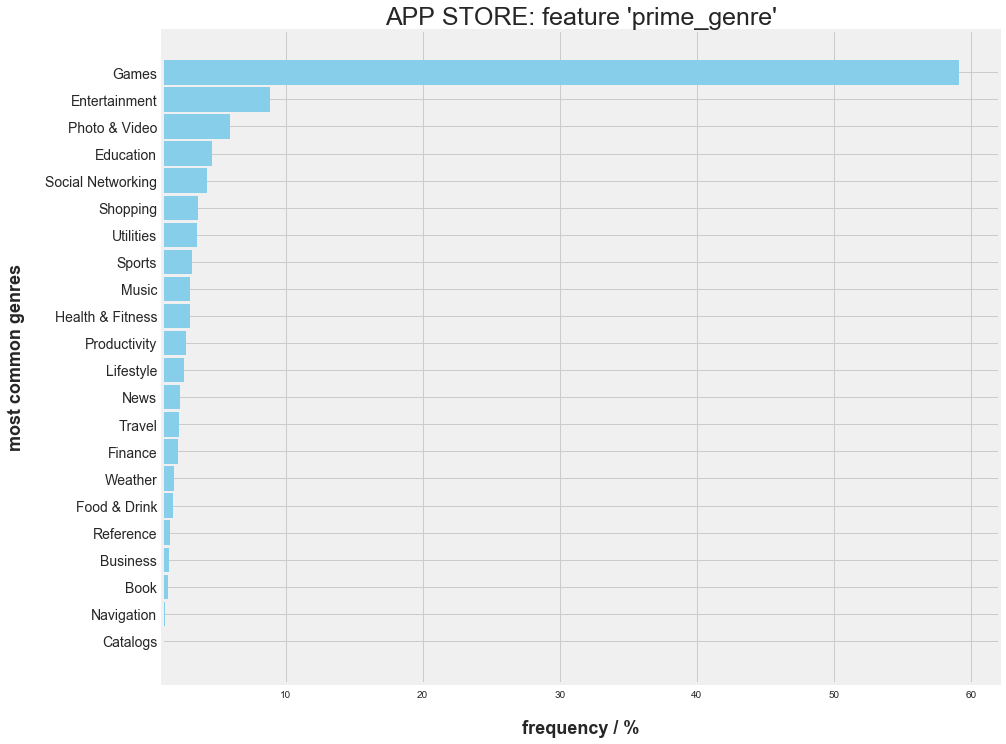

 Figure 4 . Most common genres at the App Store.



In [44]:
# App Store: column index = 11 => 'prime-genre' feature
# Play Store: column index = 1 => 'Category' feature; column index = 9 =>  'Genres'feature

freq_tab_app_store = frequency_table_Sorted(data_set = app_store_eng_free, column_index = 11)

index = np.arange(len(freq_tab_app_store))        #  a numpy methot that generates an array of sequential numbers
width = 0.9
bar_width = 1.0
plt.figure(figsize=(15, 12))
plt.style.use('fivethirtyeight')
plt.barh(index, 
        freq_tab_app_store.values(), 
        width, 
        bar_width, 
        align='center',
        color='skyblue')
plt.ylabel('most common genres', fontsize=15, labelpad=20, weight='bold', size=18)
plt.xlabel('frequency / %', fontsize=15, labelpad=20, weight='bold', size=18)
plt.yticks(index, freq_tab_app_store.keys(), fontsize=14, rotation=0)
plt.tick_params(axis='y', which='major', pad=5)
plt.title("APP STORE: feature 'prime_genre'", fontsize=25)
plt.show()
print('\033[1m Figure 4 \033[0m. Most common genres at the App Store.\n')  # using unicode for bold

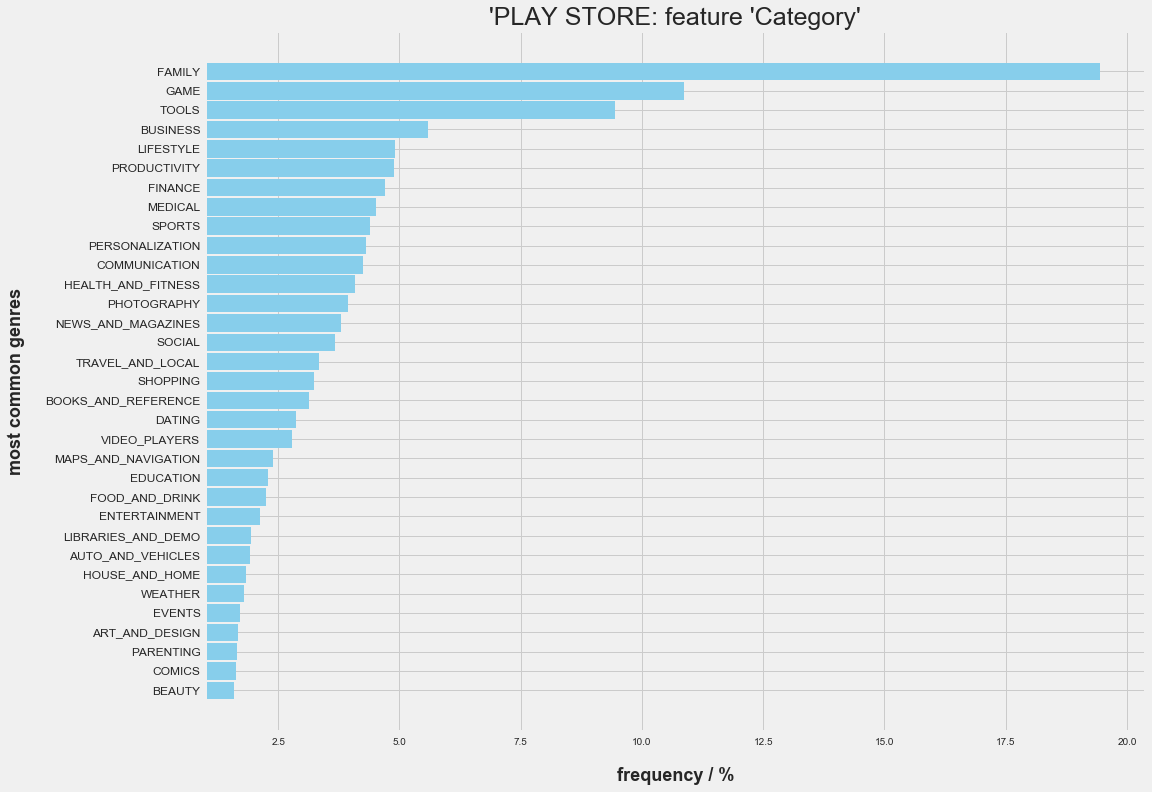

 Figure 5 . Most common genres at the Play Store by 'Category'.



In [45]:
freq_tab_play_store = frequency_table_Sorted(data_set = play_store_eng_free, column_index = 1)

index = np.arange(0, len(freq_tab_play_store), 1)        #  a numpy methot that generates an array of sequential numbers
width = 0.9
bar_width = 1.0

plt.figure(figsize=(15, 12))
plt.style.use('fivethirtyeight')
plt.barh(index, 
        freq_tab_play_store.values(), 
        width, 
        bar_width, 
        align='center',
        color='skyblue')

plt.ylabel('most common genres', fontsize=15, labelpad=20, weight='bold', size=18)
plt.xlabel('frequency / %', fontsize=15, labelpad=20, weight='bold', size=18)
plt.yticks(index, freq_tab_play_store.keys(), fontsize=12, rotation=0)
plt.tick_params(axis='y', which='major', pad=5)
# plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
plt.title("'PLAY STORE: feature 'Category'", fontsize=25)
plt.show()
print("\033[1m Figure 5 \033[0m. Most common genres at the Play Store by 'Category'.\n")  # using unicode for bold

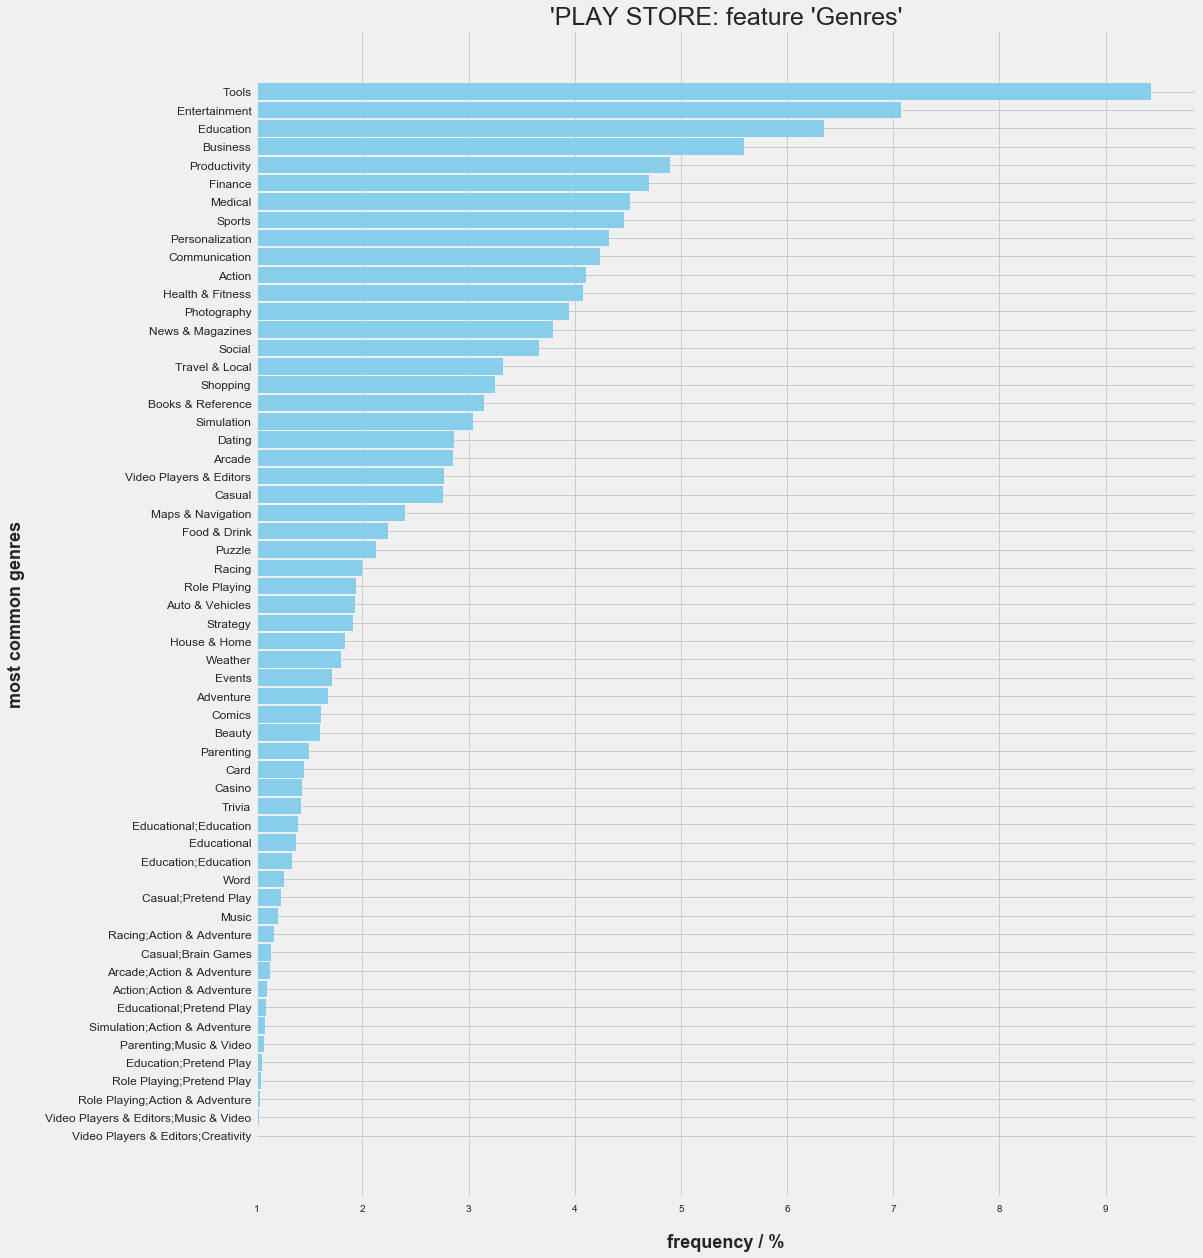

 Figure 6 . Most common genres at the Play Store by 'Genres'.



In [46]:
freq_tab_play_store = frequency_table_Sorted(data_set = play_store_eng_free, column_index = 9)

index = np.arange(0, len(freq_tab_play_store), 1)        #  a numpy methot that generates an array of sequential numbers
width = 0.9
bar_width = 1.0

plt.figure(figsize=(15, 20))
plt.style.use('fivethirtyeight')
plt.barh(index, 
        freq_tab_play_store.values(), 
        width, 
        bar_width, 
        align='center',
        color='skyblue')

plt.ylabel('most common genres', fontsize=15, labelpad=20, weight='bold', size=18)
plt.xlabel('frequency / %', fontsize=15, labelpad=20, weight='bold', size=18)
plt.yticks(index, freq_tab_play_store.keys(), fontsize=12, rotation=0)
plt.tick_params(axis='y', which='major', pad=5)
# plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
plt.title("'PLAY STORE: feature 'Genres'", fontsize=25)
plt.show()
print("\033[1m Figure 6 \033[0m. Most common genres at the Play Store by 'Genres'.\n")  # using unicode for bold

Games correspond to 58.2% of the English free apps at App Store (**Figure 4**), followed by entertainment (7.9%), photo and video (5.0%), education (3.7%), social networking (3.3%), and so on. From these numbers, it seems that App Store focuses mainly on entertainment apps (games, photo, and video, social networking, sports, music, etc) compared to more practical apps (education, shopping, utilities, productivity, etc). 

Family apps correspond to 18.4% of the English free apps at Play Store (**Figure 5**), followed by games (9.9%), tools (8.4%), business (4.6%), lifestyle (3.9%), and so on. It looks like that Play Store has a more uniform portfolio of free English apps without focusing on a specific category.

Although the feature 'Genres' (**Figure 6**) is more detailed than 'Category' (**Figure 5**), it doesn't help much. 

This gives us an overview of the most common app's genres in both stores. But, does the category with the most apps also have the most users? What genres are the most popular? What are the trends behind these numbers?

### Most popular apps by genre on App Store

We can obtain the most popular apps by genre (those who have the most users) calculating the average number of installs for each app genre. For the App Store data set, this information in the 'Installs' column. However, since it's missing for the App Store data set, we'll use the total number of user ratings instead, located in the 'rating_count_tot app' column.

In [47]:
# App Store: column index = 5 => 'rating_count_tot' feature; column index = 11 => 'prime_genre' feature

genres_app_store = frequency_table(data_set =  app_store_eng_free, column_index = 11)

dict_genre = {}
tabb =[]
for genre in genres_app_store:
    count = 0                       # stores the number of ratings for each genre
    len_genre = 0                   # stores the number of apps for each genre
    for app in app_store_eng_free:  # loop over App Store data set
        genre_app = app[11]
        if genre_app == genre:       
            n_ratings = float(app[5])  # number of user ratings
            count += n_ratings
            len_genre += 1
    avg_n_ratings = count / len_genre
    dict_genre[genre] = avg_n_ratings
    tupleware = (dict_genre[genre], genre)
    tabb.append(tupleware)
    ordered_tabb = sorted(tabb)
    ordered_tabb_dict = dict(ordered_tabb)
    inv_ordered_tabb_dict = {v: k for k, v in ordered_tabb_dict.items()}
#    ordered_table_dict = dict(ordered_table)              # transform into a dictionary: to be plot a graph with matlibplot
#    inv_ordered_table_dict = {v: k for k, v in ordered_table_dict.items()}  # invert dictionary key and value 
    
#    print(genre, ':', avg_n_ratings)
    

In [48]:
inv_ordered_tabb_dict

{'Medical': 612.0,
 'Catalogs': 4004.0,
 'Education': 7003.983050847458,
 'Business': 7491.117647058823,
 'Entertainment': 14029.830708661417,
 'Lifestyle': 16485.764705882353,
 'Utilities': 18684.456790123455,
 'Productivity': 21028.410714285714,
 'News': 21248.023255813954,
 'Games': 22788.6696905016,
 'Sports': 23008.898550724636,
 'Health & Fitness': 23298.015384615384,
 'Shopping': 26919.690476190477,
 'Travel': 28243.8,
 'Photo & Video': 28441.54375,
 'Finance': 31467.944444444445,
 'Food & Drink': 33333.92307692308,
 'Book': 39758.5,
 'Weather': 52279.892857142855,
 'Music': 57326.530303030304,
 'Social Networking': 71548.34905660378,
 'Reference': 74942.11111111111,
 'Navigation': 86090.33333333333}

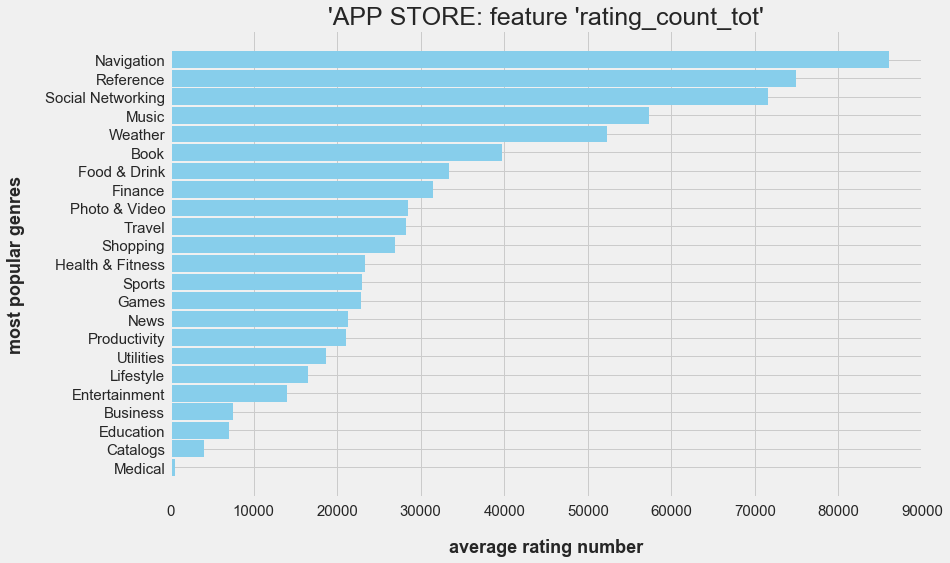

 Figure 7 . Average rating numbers for the most popular apps at the App Store.



In [49]:
index = np.arange(0, len(inv_ordered_tabb_dict), 1)        #  a numpy methot that generates an array of sequential numbers
width = 0.9
bar_width = 1.0

plt.figure(figsize=(12, 8))
plt.style.use('fivethirtyeight')
plt.barh(index, 
        inv_ordered_tabb_dict.values(), 
        width, 
        bar_width, 
        align='center',
        color='skyblue')

plt.ylabel('most popular genres', fontsize=14, labelpad=20, weight='bold', size=18)
plt.xlabel('average rating number', fontsize=15, labelpad=20, weight='bold', size=18)
plt.yticks(index, inv_ordered_tabb_dict.keys(), fontsize=15, rotation=0)
plt.xticks(fontsize=15)
plt.tick_params(axis='y', which='major', pad=5)
plt.xlim(0, 90000)
# plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
plt.title("'APP STORE: feature 'rating_count_tot'", fontsize=25)
plt.show()
print('\033[1m Figure 7 \033[0m. Average rating numbers for the most popular apps at the App Store.\n')  # using unicode for bold

* The most popular genre is navigation (**Figure 7**). However it's biased by Google Maps and Waze that together add up 499957 user reviews which correspond to 98% of the genre. 
* The second place is occupied by reference apps, but this position is granted mainly by the Bible and Dictionary.com. 
* The same is true for social networking apps where Facebook and Pinterest lead.


**App profile recommendations**: 

As discussed before, the App Store focuses on entertainment apps so it seems a good idea to use this innate talent to launch a new app. In addition, online music and video streaming services are an entertainment product that is on the rise. Just to get an idea of the numbers behind the cloud, at the first four days at the Strange Things 3 premiere, a Netflix production, over 40 million households tuned it. Even though Netflix has a lot of titles in its collection, it is well known that it takes longer to find a show than to watch it.  Besides that, its recommendation system also doesn't please all users. This scenario presents a good opportunity that deserves to be explored: 
* What if you have an easier way to search on the Netflix collection? What if you could interact with other users/friends that watched the show you are interested in to ask about their impressions about the show and later you also could share with them your own impressions? What if you could have easy access to the soundtrack of your loved show in your preferred music streaming service through a link? This app profile seems to be a good recommendation and its integrated search through movie & music and its user-based classification could add value to the final product.

Health and fitness category also offer some possibilities: 
* Congratulations you are a Mum now! And, if it's your first time, you will probably face many challenges. I have seen lots of mothers using *What's up* groups to share information about the different aspects of the development of their children, reviewing/recommending baby products and also sharing specials offers they found on the internet or physical stores. I believe that a well-designed app could do this job much more elegantly and productively! The app could also have included niche targeted news.  Since baby have different stages of development, mothers should also be grouped using this rationale. For example, for the first 24 months of the baby's life, mothers would be grouped by the month of birth (first month, second month, etc). From 24 to the 36 month they could be group by the year of birth.

Regarding the apps in the medical category there is a significant absence of them at the App Store what can also be explored. Lets see one simple example:
* Nowadays, the most effective method of control of these three viral diseases, [dengue, Zika and chinkungunya](https://www.who.int/neglected_diseases/diseases/en/), is the eradication of the transmitting mosquito. However the transmitter is completely adapted in urban and home environments what favors its spread. The population can and must play a more active role in urban mosquito control. Of course anyone can try to avoid mosquito bytes using insect repellent, long-sleeved shirts and long pants, but I mean here actions like empty and scrub, turn over, cover, or throw out items that hold water, such as tires, buckets, planters, toys, or trash containers inside and outside your home. In this context an app that could take pictures from the mosquito reservoirs, get the GPS coordinates and put all of it in an online map could be of a great help in monitoring these diseases.

In [50]:
# Navigation => (345046+154911+12811+187+5+3582)/6 = 86090.3333333333
for app in app_store_eng_free:
    if app[11] == 'Navigation':
#        print(app[1], ':', app[5])
        print('{:_<60}{:''>8}'.format(app[1], app[5])) 

Waze - GPS Navigation, Maps & Real-time Traffic_____________  345046
Geocaching®_________________________________________________   12811
ImmobilienScout24: Real Estate Search in Germany____________     187
Railway Route Search________________________________________       5
CoPilot GPS – Car Navigation & Offline Maps_________________    3582
Google Maps - Navigation & Transit__________________________  154911


In [51]:
print('Showing apps with rates greater that 10k:\n')
for app in app_store_eng_free:
    if app[11] == 'Reference':
#        print(app[1], ':', app[5]) 
        if int(app[5]) > 10000:
             print('{:_<80}{:''>8}'.format(app[1], app[5])) 

Showing apps with rates greater that 10k:

Bible___________________________________________________________________________  985920
Dictionary.com Dictionary & Thesaurus___________________________________________  200047
Dictionary.com Dictionary & Thesaurus for iPad__________________________________   54175
Muslim Pro: Ramadan 2017 Prayer Times, Azan, Quran______________________________   18418
Merriam-Webster Dictionary______________________________________________________   16849
Google Translate________________________________________________________________   26786
Night Sky_______________________________________________________________________   12122
New Furniture Mods - Pocket Wiki & Game Tools for Minecraft PC Edition__________   17588


In [52]:
print('Showing apps with rates greater that 100k:\n')
for app in app_store_eng_free:
    if app[11] == 'Social Networking':
#        print(app[1], ':', app[5])
        if int(app[5]) > 100000: 
             print('{:_<60}{:''>8}'.format(app[1], app[5])) 

Showing apps with rates greater that 100k:

Facebook____________________________________________________ 2974676
Skype for iPhone____________________________________________  373519
Tumblr______________________________________________________  334293
WhatsApp Messenger__________________________________________  287589
TextNow - Unlimited Text + Calls____________________________  164963
Kik_________________________________________________________  260965
Viber Messenger – Text & Call_______________________________  164249
ooVoo – Free Video Call, Text and Voice_____________________  177501
Pinterest___________________________________________________ 1061624
Messenger___________________________________________________  351466
Followers - Social Analytics For Instagram__________________  112778


In [53]:
print('Showing apps with rates greater that 100k:\n')
for app in app_store_eng_free:
    if app[11] == 'Music':
#        print(app[1], ':', app[5])
        if int(app[5]) > 100000:
             print('{:_<60}{:''>8}'.format(app[1], app[5])) 

Showing apps with rates greater that 100k:

Pandora - Music & Radio_____________________________________ 1126879
Shazam - Discover music, artists, videos & lyrics___________  402925
iHeartRadio – Free Music & Radio Stations___________________  293228
Spotify Music_______________________________________________  878563
SoundCloud - Music & Audio__________________________________  135744
TuneIn Radio - MLB NBA Audiobooks Podcasts Music____________  110420
Magic Piano by Smule________________________________________  131695
Smule Sing!_________________________________________________  119316
Amazon Music________________________________________________  106235


In [54]:
#print('Showing apps with rates greater that 100k:\n')
for app in app_store_eng_free:
    if app[11] == 'Health & Fitness':
#        print(app[1], ':', app[5])
#        if int(app[5]) > 100000:
             print('{:_<60}{:''>8}'.format(app[1], app[5])) 

Lifesum – Inspiring healthy lifestyle app___________________    5795
Lose It! – Weight Loss Program and Calorie Counter__________  373835
Nike+ Training Club - Workouts & Fitness Plans______________   33969
Sleep Cycle alarm clock_____________________________________  104539
Period Tracker Lite_________________________________________   53620
Weight Watchers_____________________________________________  136833
My Cycles Period and Ovulation Tracker______________________    7469
Runtastic Running, Jogging and Walking Tracker______________   10298
Calorie Counter & Diet Tracker by MyFitnessPal______________  507706
Waterlogged - Daily Hydration Tracker_______________________    5000
WebMD for iPad______________________________________________    9142
Fooducate - Lose Weight, Eat Healthy,Get Motivated__________   11875
My Score Plus Weight Loss, Food & Exercise Tracker__________     467
VIBO RealMassager___________________________________________       6
Fitbit____________________________

### Most popular apps by genre on Play Store

The Play Store the only available data is the numbers of installs, and the open-ended numbers (100+, 500+, etc) it brings are not precise.

In [55]:
freq_tab_sorted = frequency_table_Sorted(data_set = play_store_eng_free, column_index = 5) # Installs feature, column 5
freq_tab_sorted

{'0': 0.011284134506883321,
 '0+': 0.045136538027533285,
 '1,000,000,000+': 0.22568269013766643,
 '500,000,000+': 0.2708192281651997,
 '1+': 0.5077860528097494,
 '5+': 0.7898894154818324,
 '50+': 1.9183028661701647,
 '100,000,000+': 2.1214172872940646,
 '50,000,000+': 2.279395170390431,
 '500+': 3.2498307379823967,
 '10+': 3.5432182351613632,
 '5,000+': 4.513653802753328,
 '50,000+': 4.773188896411646,
 '500,000+': 5.574362446400361,
 '5,000,000+': 6.82690137666441,
 '100+': 6.917174452719477,
 '1,000+': 8.395396073121193,
 '10,000+': 10.212141728729407,
 '10,000,000+': 10.550665763935905,
 '100,000+': 11.543669600541637,
 '1,000,000+': 15.730083502595352}

In [56]:
# play_store_eng_free[1]

In [57]:
for app in play_store_eng_free:
    if app[2] == 'Health & Fitness':
#        print(app[1], ':', app[5])
#        if int(app[5]) > 100000:
             print('{:_<60}{:''>8}'.format(app[1], app[5]))

In [58]:
# Play Store: column index = 5 => 'Instlalls' feature

category_play_store = frequency_table(data_set =  play_store_eng_free, column_index = 1)

dict_category = {}
tabb =[]

for category in category_play_store:
    count = 0                          # stores the number of ratings for each genre
    len_category = 0                   # stores the number of apps for each genre
    for app in play_store_eng_free:    # loop over App Store data set
        category_app = app[1]
        if category_app == category:       
            n_installs = app[5]       # number of user ratings
            n_installs = n_installs.replace(',','')
            n_installs = n_installs.replace('+','')
            count += float(n_installs)
            len_category += 1   
    avg_n_installs = count / len_category
    dict_category[category] = avg_n_installs
    tupleware = (dict_category[category], category)
    tabb.append(tupleware)
    ordered_tabb = sorted(tabb)
    ordered_tabb_dict = dict(ordered_tabb)               # transform into a dictionary: to be plot a graph with matlibplot                 
    inv_ordered_tabb_dict = {v: k for k, v in ordered_tabb_dict.items()}    # invert dictionary key and value
    
#    print(category, ':', avg_n_installs)
    

In [59]:
inv_ordered_tabb_dict

{'MEDICAL': 120616.48717948717,
 'EVENTS': 253542.22222222222,
 'BEAUTY': 513151.88679245283,
 'PARENTING': 542603.6206896552,
 'LIBRARIES_AND_DEMO': 638503.734939759,
 'AUTO_AND_VEHICLES': 647317.8170731707,
 'COMICS': 817657.2727272727,
 'DATING': 854028.8303030303,
 'HOUSE_AND_HOME': 1313681.9054054054,
 'FINANCE': 1387692.475609756,
 'LIFESTYLE': 1437816.2687861272,
 'BUSINESS': 1712290.1474201474,
 'ART_AND_DESIGN': 1905351.6666666667,
 'FOOD_AND_DRINK': 1924897.7363636363,
 'FAMILY': 2691618.159021407,
 'EDUCATION': 3082017.543859649,
 'SPORTS': 3638640.1428571427,
 'MAPS_AND_NAVIGATION': 4056941.7741935486,
 'HEALTH_AND_FITNESS': 4188821.9853479853,
 'WEATHER': 5074486.197183099,
 'PERSONALIZATION': 5201482.6122448975,
 'SHOPPING': 7036877.311557789,
 'BOOKS_AND_REFERENCE': 8767811.894736841,
 'NEWS_AND_MAGAZINES': 9549178.467741935,
 'TOOLS': 10695245.286096256,
 'TRAVEL_AND_LOCAL': 13984077.710144928,
 'GAME': 15837565.085714286,
 'PRODUCTIVITY': 16787331.344927534,
 'PHOTOGRA

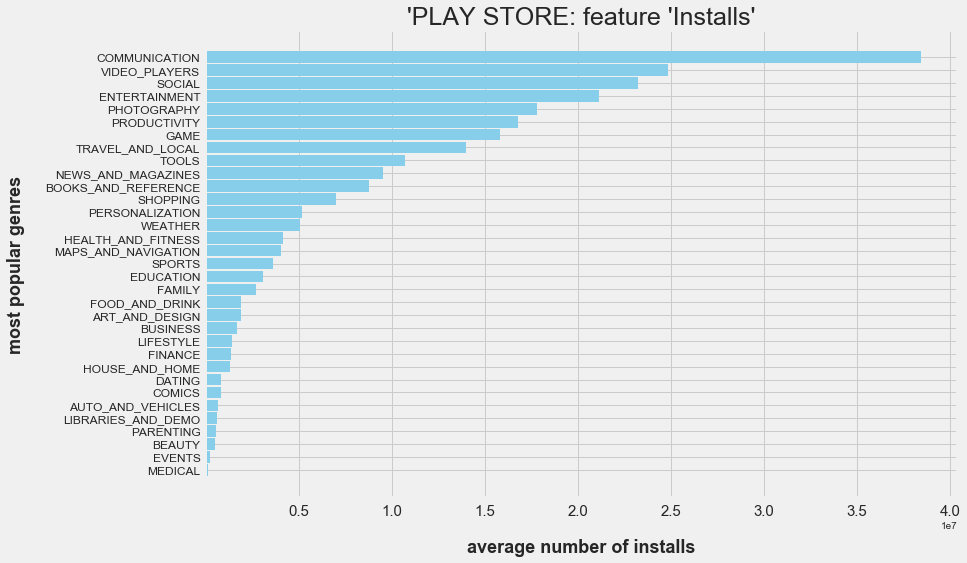

 Figure 8 . Average number of installs for the most popular apps at the Play Store.



In [60]:
index = np.arange(0, len(inv_ordered_tabb_dict), 1)        #  a numpy methot that generates an array of sequential numbers
width = 0.9
bar_width = 1.0

plt.figure(figsize=(12, 8))
plt.style.use('fivethirtyeight')
plt.barh(index, 
        inv_ordered_tabb_dict.values(), 
        width, 
        bar_width, 
        align='center',
        color='skyblue')

plt.ylabel('most popular genres', fontsize=14, labelpad=20, weight='bold', size=18)
plt.xlabel('average number of installs', fontsize=15, labelpad=20, weight='bold', size=18)
plt.yticks(index, inv_ordered_tabb_dict.keys(), fontsize=12, rotation=0)
plt.xticks(fontsize=15)
plt.tick_params(axis='y', which='major', pad=5)
#plt.xlim(0, 4)
# plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
plt.title("'PLAY STORE: feature 'Installs'", fontsize=25)
plt.show()
print('\033[1m Figure 8 \033[0m. Average number of installs for the most popular apps at the Play Store.\n')  # using unicode for bold

The most installed apps at the Play Store, with 38,456,119 installs, are communication apps. Each one of the following apps, Messenger, WhatsApp, Google Chrome, Gmail Hangouts, has 1 billion installs, while a few others have 100 and 500 million installs. If we do not take into account the apps with over 100 million installs, the average will be greater reduced about 10 times (see calculation below). The category video players comes in second place with 24,852,732 installs where YouTube, Google Play Movies & TV, and MX Player top the list. The category social ranks third and displays the same pattern as previously noted, i.e., giants (Facebook, Instagram, Google+) figure on the first places of the list. The same observation holds for other categories as entertainment, photography, productivity.  As we can see, the market is dominated by the largest companies in the sector and it would be hard to compete against them.

After exploring categories it seems that last two of our previous app ideas for the App Store also would have space here in the categories parenting and medical. Choosing not to hit the giants could increase the chances of success of this new product.

In [61]:
under_100_m = []

for app in play_store_eng_free:
    n_installs = app[5]
    n_installs = n_installs.replace(',', '')
    n_installs = n_installs.replace('+', '')
    if (app[1] == 'COMMUNICATION') and (float(n_installs) < 100000000):
        under_100_m.append(float(n_installs))
    if (app[1] == 'COMMUNICATION') and (float(n_installs) > 1000000000):        
        print('{:_<60}{:''>8}'.format(app[0], app[5]))
print('\n')
sum(under_100_m) / len(under_100_m)

3603485.3884615386

In [62]:
for app in play_store_eng_free:
    n_installs = app[5]
    n_installs = n_installs.replace(',', '')
    n_installs = n_installs.replace('+', '')

    if (app[1] == 'VIDEO_PLAYERS') and (float(n_installs) > 100000000):        
        print('{:_<60}{:''>8}'.format(app[0], app[5]))
print('\n')

YouTube_____________________________________________________1,000,000,000+
Google Play Movies & TV_____________________________________1,000,000,000+
MX Player___________________________________________________500,000,000+




In [63]:
for app in play_store_eng_free:
    n_installs = app[5]
    n_installs = n_installs.replace(',', '')
    n_installs = n_installs.replace('+', '')

    if (app[1] == 'SOCIAL') and (float(n_installs) > 100000000):        
        print('{:_<60}{:''>8}'.format(app[0], app[5]))
print('\n')

Facebook____________________________________________________1,000,000,000+
Instagram___________________________________________________1,000,000,000+
Facebook Lite_______________________________________________500,000,000+
Snapchat____________________________________________________500,000,000+
Google+_____________________________________________________1,000,000,000+




In [64]:
for app in play_store_eng_free:
    n_installs = app[5]
    n_installs = n_installs.replace(',', '')
    n_installs = n_installs.replace('+', '')

    if (app[1] == 'ENTERTAINMENT') and (float(n_installs) > 10000000):        
        print('{:_<60}{:''>8}'.format(app[0], app[5]))
print('\n')

Netflix_____________________________________________________100,000,000+
YouTube Kids________________________________________________50,000,000+
Google Play Games___________________________________________1,000,000,000+
Hotstar_____________________________________________________100,000,000+
Talking Angela______________________________________________100,000,000+
Talking Ginger 2____________________________________________50,000,000+
Amazon Prime Video__________________________________________50,000,000+
IMDb Movies & TV____________________________________________100,000,000+
Twitch: Livestream Multiplayer Games & Esports______________50,000,000+
PlayStation App_____________________________________________50,000,000+
Talking Ben the Dog_________________________________________100,000,000+




In [65]:
for app in play_store_eng_free:
    n_installs = app[5]
    n_installs = n_installs.replace(',', '')
    n_installs = n_installs.replace('+', '')

    if (app[1] == 'PHOTOGRAPHY') and (float(n_installs) > 50000000):        
        print('{:_<60}{:''>8}'.format(app[0], app[5]))
print('\n')

Google Photos_______________________________________________1,000,000,000+
B612 - Beauty & Filter Camera_______________________________100,000,000+
YouCam Makeup - Magic Selfie Makeovers______________________100,000,000+
BeautyPlus - Easy Photo Editor & Selfie Camera______________100,000,000+
Sweet Selfie - selfie camera, beauty cam, photo edit________100,000,000+
YouCam Perfect - Selfie Photo Editor________________________100,000,000+
Cymera Camera- Photo Editor, Filter,Collage,Layout__________100,000,000+
LINE Camera - Photo editor__________________________________100,000,000+
Candy Camera - selfie, beauty camera, photo editor__________100,000,000+
Camera360: Selfie Photo Editor with Funny Sticker___________100,000,000+
Photo Editor Pro____________________________________________100,000,000+
Retrica_____________________________________________________100,000,000+
PicsArt Photo Studio: Collage Maker & Pic Editor____________100,000,000+
Photo Collage Editor_____________________________

In [66]:
for app in play_store_eng_free:
    n_installs = app[5]
    n_installs = n_installs.replace(',', '')
    n_installs = n_installs.replace('+', '')

    if (app[1] == 'PRODUCTIVITY') and (float(n_installs) > 100000000):        
        print('{:_<60}{:''>8}'.format(app[0], app[5]))
print('\n')

Microsoft Word______________________________________________500,000,000+
Google Drive________________________________________________1,000,000,000+
Dropbox_____________________________________________________500,000,000+
Google Calendar_____________________________________________500,000,000+
Cloud Print_________________________________________________500,000,000+




In [67]:
for app in play_store_eng_free:
    n_installs = app[5]
    n_installs = n_installs.replace(',', '')
    n_installs = n_installs.replace('+', '')

    if (app[1] == 'GAME') and (float(n_installs) > 100000000):        
        print('{:_<60}{:''>8}'.format(app[0], app[5]))
print('\n')

Subway Surfers______________________________________________1,000,000,000+
Candy Crush Saga____________________________________________500,000,000+
Temple Run 2________________________________________________500,000,000+
Pou_________________________________________________________500,000,000+
My Talking Tom______________________________________________500,000,000+




In [68]:
CATEG_NAME = (input('In which category (see Figure 8) from Play Store are you interested in? '))
LIMIT = int(input('Diplay entries with installs greater than: '))
print('\n')
for app in play_store_eng_free:
    n_installs = app[5]
    n_installs = n_installs.replace(',', '')
    n_installs = n_installs.replace('+', '')
    
    if (app[1] == CATEG_NAME) and (float(n_installs) > LIMIT):        
        print('{:_<60}{:''>8}'.format(app[0], app[5]))
print('\n')

In which category (see Figure 8) from Play Store are you interested in?  COMICS
Diplay entries with installs greater than:  100000




LINE WEBTOON - Free Comics__________________________________10,000,000+
Manga Master - Best manga & comic reader____________________500,000+
GANMA! - All original stories free of charge for all original comics1,000,000+
Röhrich Werner Soundboard___________________________________500,000+
Manga Rock - Best Manga Reader______________________________1,000,000+
comico Popular Original Cartoon Updated Everyday Comico_____5,000,000+
漫咖 Comics - Manga,Novel and Stories_________________________1,000,000+
DC Comics___________________________________________________1,000,000+
Manga Zero - Japanese cartoon and comic reader______________1,000,000+
Marvel Unlimited____________________________________________1,000,000+
Tapas – Comics, Novels, and Stories_________________________1,000,000+
Narrator's Voice____________________________________________5,000,000+
Buff Thun - Daily Free Webtoon / Comics / Web Fiction / Mini Game500,000+
pixiv comic - everyone's manga app__________________________1,000,0

## Final considerations

Using data analytics made it possible to map the profile of English free apps from App Store and Play Store. From the knowledge of the most common apps and most popular ones, was possible to suggest three promising ideas to build new apps for both markets using the concept of gamification: **(i)** an app that proposes to make the search for shows on Netflix less painfull while integrates another functionalities, **(ii)** an app that would work as a social network for mums share what they want about their babies and **(iii)** an app to help the fight against dengue disease. Besides that, the suggested apps have a strong social-network DNA what could make them funny and addictive to the users. 

As expected, most of the time was consumed in cleaning the data. In addition, data visualization with Matplotlib make the analysis easier.  